In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [3]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state

In [4]:
model.find_ss(0.50,do_print=True)

Labor supply and search and matching:
ss.S = 7.44,  ss.L = 56.28,  ss.delta_L = 0.07,  ss.v = 16.52,  ss.m_v = 0.23
Capital agency FOC:
ss.r_K = 0.14
Production firm pricing:
ss.r_ell = 2.71
Labor agency:
ss.ell = 55.87,  ss.w = 2.68
Government:
ss.B_G = 1.00,  ss.G = 0.00,  ss.tau = 0.00
Households:
solving for household behavior: result.converged = True
ss.C = 169.36,  ss.B = 464.85
Production firm FOCs:
ss.K = 557.43
Capital accumulation equation:
ss.I = 55.74
Output in production firm:
ss.Y = 229.56
Market clearing:
ss.C_Y = 118.55,  ss.G_Y = 0.00,  ss.I_Y = 36.23,  ss.X_Y = 74.78
[ ss.C_M = 50.81,  ss.G_M = 0.00,  ss.I_M = 19.51,  ss.X_M = 49.85 ] = ss.M = 120.17
ss.X = 124.63
Bargaining:
par.phi = 0.988


**Household behavior:**

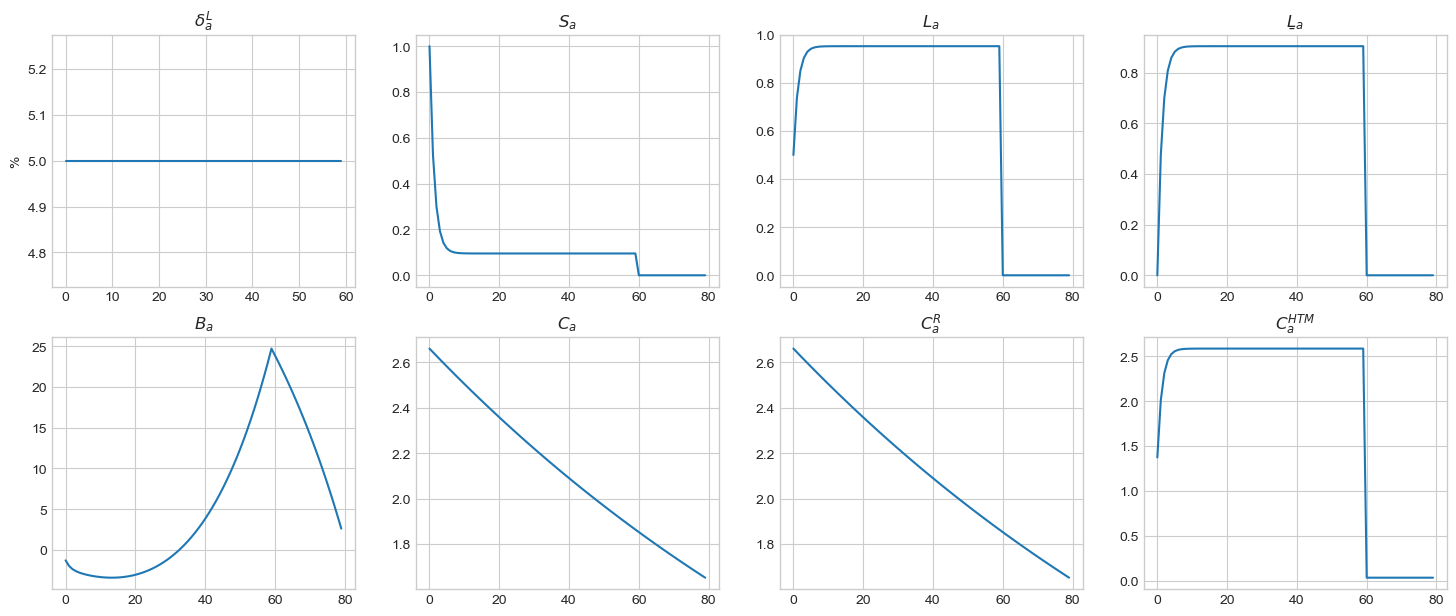

In [5]:
fig = plt.figure(figsize=(3*6,3*6/2.5))

ax = fig.add_subplot(2,4,1)
ax.plot(model.par.delta_L_a*100)
ax.set_ylabel('%')
ax.set_title('$\delta^L_a$')

ax = fig.add_subplot(2,4,2)
ax.plot(model.ss.S_a)
ax.set_title('$S_a$')

ax = fig.add_subplot(2,4,3)
ax.plot(model.ss.L_a)
ax.set_title('$L_a$')

ax = fig.add_subplot(2,4,4)
ax.plot(model.ss.L_ubar_a)
ax.set_title(r'$L\underbar_a$')

ax = fig.add_subplot(2,4,5)
ax.plot(model.ss.B_a)
ax.set_ylabel('')
ax.set_title('$B_a$')

ax = fig.add_subplot(2,4,6)
ax.plot(model.ss.C_a)
ax.set_ylabel('')
ax.set_title('$C_a$')

ax = fig.add_subplot(2,4,7)
ax.plot(model.ss.C_R)
ax.set_ylabel('')
ax.set_title('$C^R_a$')

ax = fig.add_subplot(2,4,8)
ax.plot(model.ss.C_HTM)
ax.set_ylabel('')
ax.set_title('$C^{HTM}_a$');

# Speed and error tests

In [6]:
model.set_exo_ss()
model.set_unknowns_ss()

**Python evaluation:**

In [7]:
%time model.evaluate_blocks(py=True)

CPU times: total: 1.84 s
Wall time: 1.85 s


**Check errors:**

In [8]:
errors = model.get_errors(do_print=True)

bargaining_cond     : abs. max = 0.00e+00
Bq_match            : abs. max = 6.46e+01
FOC_capital_agency  : abs. max = 4.64e-02
FOC_K_ell           : abs. max = 1.13e+00
mkt_clearing        : abs. max = 1.81e+01


**First numba evaluation:**

In [9]:
%time model.evaluate_blocks()

CPU times: total: 20.4 s
Wall time: 20.5 s


**Time:**

In [10]:
%timeit model.evaluate_blocks()
%timeit model.get_errors()

4.54 ms ± 31 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.1 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%timeit model.evaluate_blocks(py=True)

228 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Find an impulse-response

**Calculate Jacobian:**

In [12]:
model.calc_jac(do_print=True)

Jacobian calculated in 12.0 secs secs


Only needs to be calculated once.

**Set exogenous variables:**

In [13]:
model.set_exo_ss()

Here we shock export demand:

In [14]:
Tshock = 50
shock = 0.01*ss.chi
persistence = 0.8**np.arange(Tshock)
sol.chi[:Tshock] = ss.chi + shock*persistence

Check errors when guessing at steady state -> excess demand

In [15]:
model.set_unknowns_ss()
model.evaluate_blocks()
errors = model.get_errors(do_print=True)

bargaining_cond     : abs. max = 0.00e+00
Bq_match            : abs. max = 3.41e-01
FOC_capital_agency  : abs. max = 2.00e-06
FOC_K_ell           : abs. max = 4.69e-05
mkt_clearing        : abs. max = 7.48e-01


**Find IRF:**

In [16]:
model.find_IRF()

initial:
   max. abs. error = 7.48e-01
    0.00e+00 in bargaining_cond
    3.40e-01 in Bq_match
    2.24e-07 in FOC_capital_agency
    5.26e-06 in FOC_K_ell
    7.48e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 7.48e-01
    5.29e-06 in bargaining_cond
    3.27e-02 in Bq_match
    1.36e-05 in FOC_capital_agency
    7.77e-04 in FOC_K_ell
    1.60e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 3.27e-02
    7.01e-08 in bargaining_cond
    8.19e-03 in Bq_match
    2.37e-05 in FOC_capital_agency
    1.02e-03 in FOC_K_ell
    1.77e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.77e-02
    5.61e-08 in bargaining_cond
    3.52e-03 in Bq_match
    9.16e-06 in FOC_capital_agency
    4.08e-04 in FOC_K_ell
    7.14e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

**Plot:**

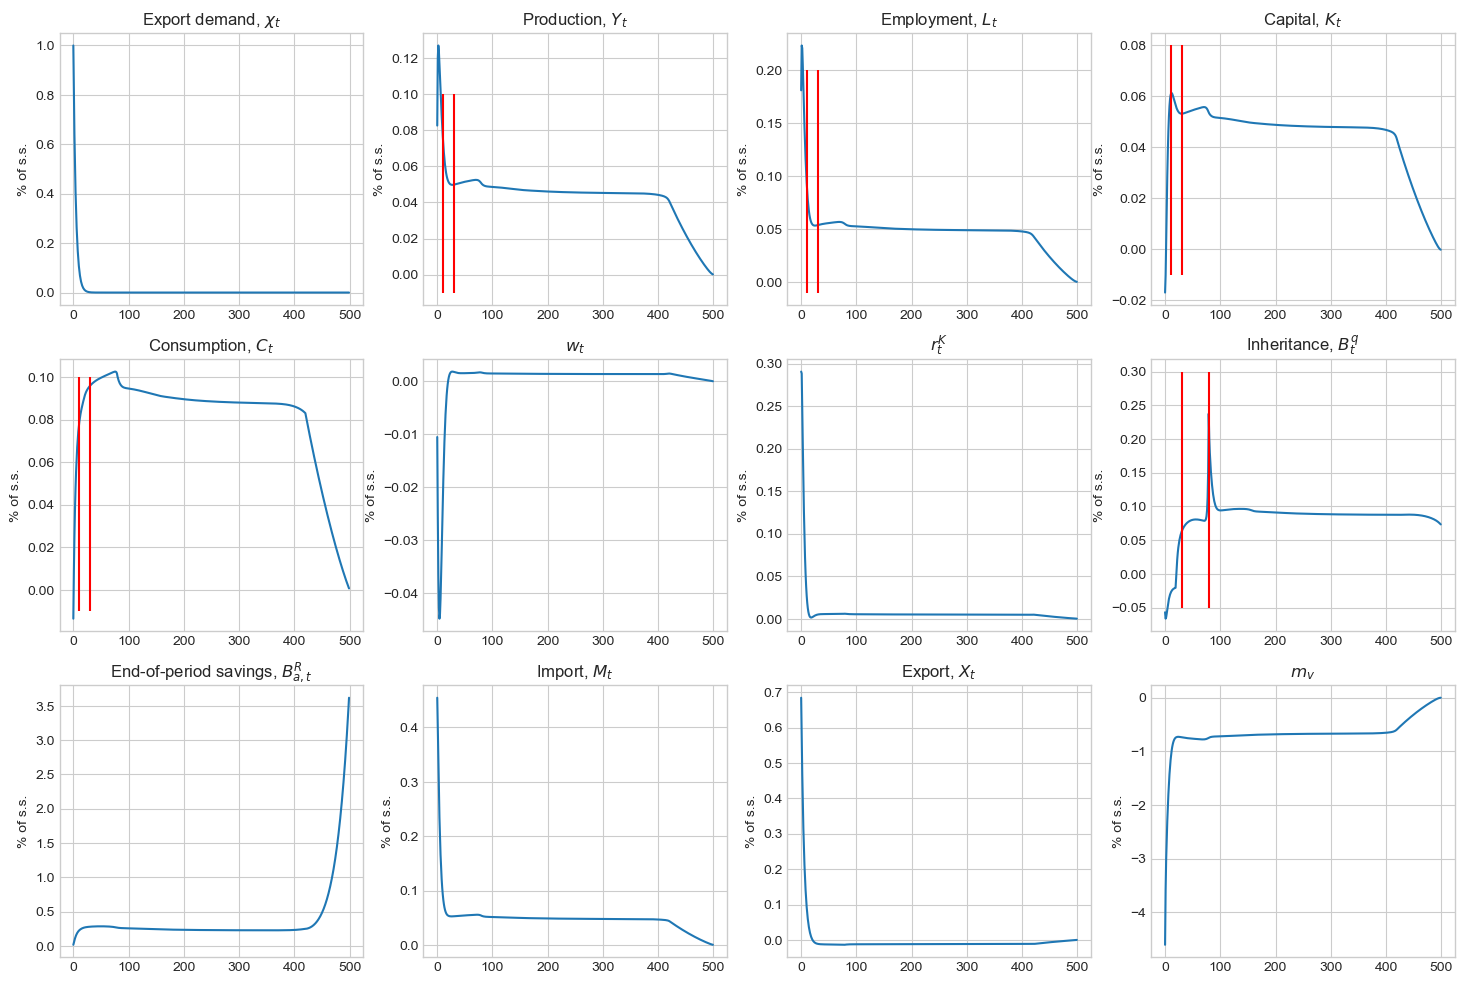

In [17]:
T_IRF = 500

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,4,1)
ax.plot((sol.chi[:T_IRF]/ss.chi-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Export demand, $\chi_t$')

ax = fig.add_subplot(3,4,2)
ax.plot((sol.Y[:T_IRF]/ss.Y-1)*100)
ax.vlines(10,-0.01,0.1,colors = 'r')
ax.vlines(30,-0.01,0.1,colors = 'r')
ax.set_ylabel('% of s.s.')
ax.set_title('Production, $Y_t$')

ax = fig.add_subplot(3,4,3)
ax.plot((sol.L[:T_IRF]/ss.L-1)*100)
ax.vlines(10,-0.01,0.2,colors = 'r')
ax.vlines(30,-0.01,0.2,colors = 'r')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment, $L_t$')

ax = fig.add_subplot(3,4,4)
ax.plot((sol.K[:T_IRF]/ss.K-1)*100)
ax.vlines(10,-0.01,0.08,colors = 'r')
ax.vlines(30,-0.01,0.08,colors = 'r')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital, $K_t$')

ax = fig.add_subplot(3,4,5)
ax.plot((sol.C[:T_IRF]/ss.C-1)*100)
ax.vlines(10,-0.01,0.1,colors = 'r')
ax.vlines(30,-0.01,0.1,colors = 'r')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption, $C_t$')

ax = fig.add_subplot(3,4,6)
ax.plot((sol.w[:T_IRF]/(ss.w)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$w_t$')

ax = fig.add_subplot(3,4,7)
ax.plot((sol.r_K[:T_IRF]/(ss.r_K)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$r^K_t$')

ax = fig.add_subplot(3,4,8)
ax.plot((sol.Bq[:T_IRF]/(ss.Bq)-1)*100)
ax.vlines(80,-0.05,0.3,colors = 'r')
ax.vlines(30,-0.05,0.3,colors = 'r')
ax.set_ylabel('% of s.s.')
ax.set_title('Inheritance, $B^q_t$')

ax = fig.add_subplot(3,4,9)
ax.plot((sol.B[:T_IRF]/(ss.B)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('End-of-period savings, $B^R_{a,t}$')

ax = fig.add_subplot(3,4,10)
ax.plot((sol.M[:T_IRF]/(ss.M)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Import, $M_t$')

ax = fig.add_subplot(3,4,11)
ax.plot((sol.X[:T_IRF]/(ss.X)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Export, $X_t$')

ax = fig.add_subplot(3,4,12)
ax.plot((sol.m_v[:T_IRF]/(ss.m_v)-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$m_v$');

Text(0.5, 1.0, '$P^M_X$')

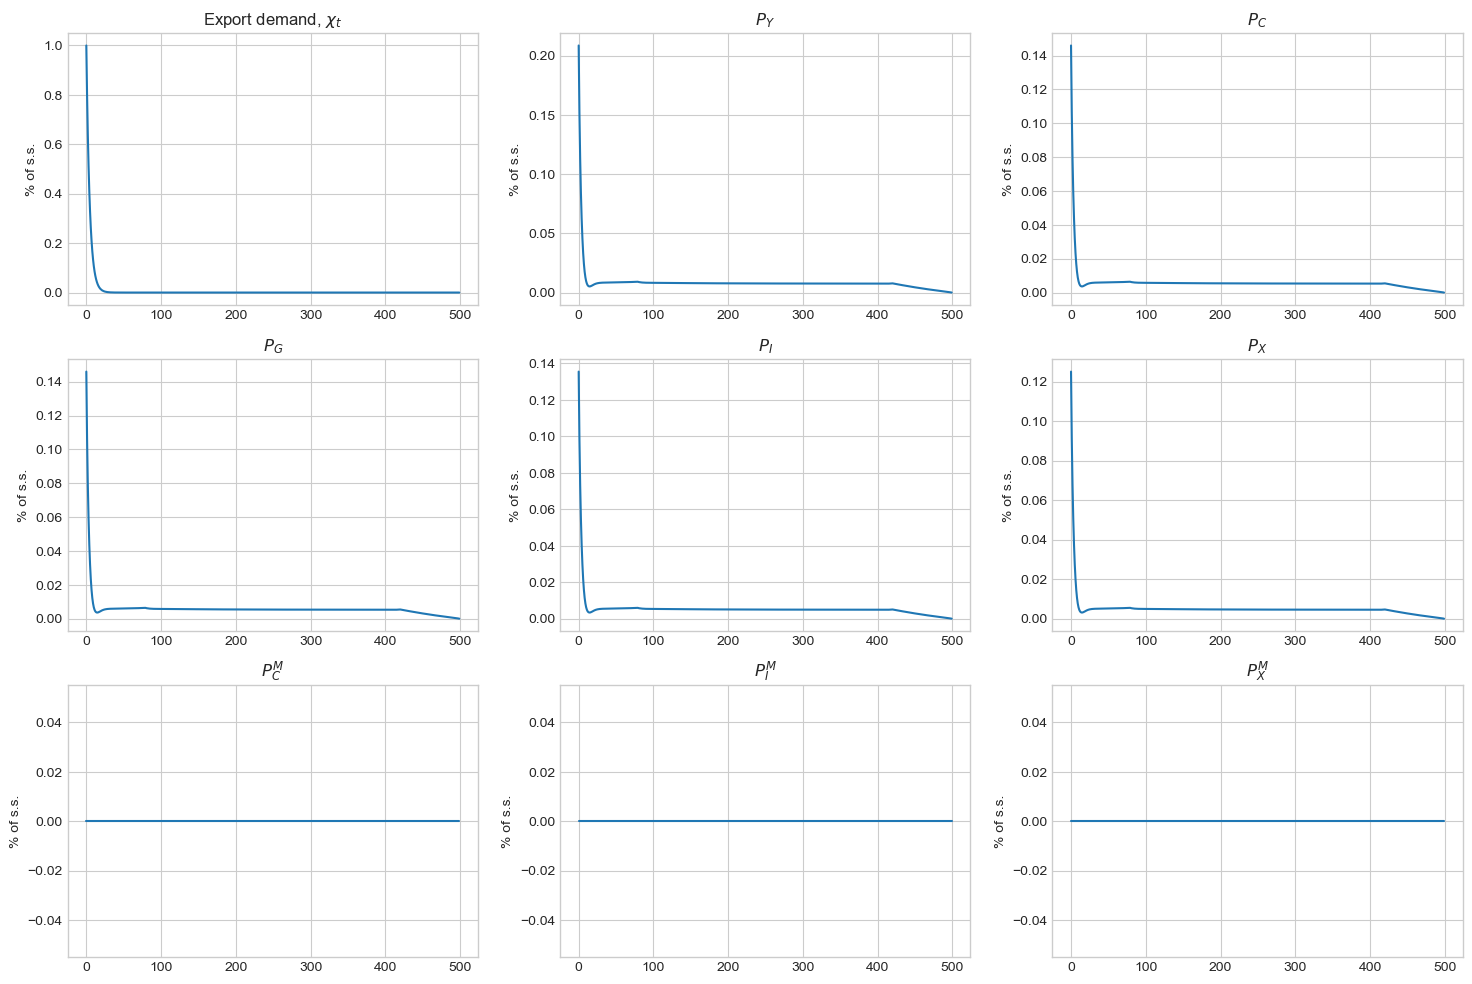

In [18]:
T_IRF = 500

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((sol.chi[:T_IRF]/ss.chi-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('Export demand, $\chi_t$')

ax = fig.add_subplot(3,3,2)
ax.plot((sol.P_Y[:T_IRF]/ss.P_Y-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P_Y$')

ax = fig.add_subplot(3,3,3)
ax.plot((sol.P_C[:T_IRF]/ss.P_C-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P_C$')

ax = fig.add_subplot(3,3,4)
ax.plot((sol.P_G[:T_IRF]/ss.P_G-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P_G$')

ax = fig.add_subplot(3,3,5)
ax.plot((sol.P_I[:T_IRF]/ss.P_I-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P_I$')

ax = fig.add_subplot(3,3,6)
ax.plot((sol.P_X[:T_IRF]/ss.P_X-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P_X$')

ax = fig.add_subplot(3,3,7)
ax.plot((sol.P_M_C[:T_IRF]/ss.P_M_C-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P^M_C$')

ax = fig.add_subplot(3,3,8)
ax.plot((sol.P_M_I[:T_IRF]/ss.P_M_I-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P^M_I$')

ax = fig.add_subplot(3,3,9)
ax.plot((sol.P_M_X[:T_IRF]/ss.P_M_X-1)*100)
ax.set_ylabel('% of s.s.')
ax.set_title('$P^M_X$')


In [19]:
sol.M

array([120.71664623, 120.64758204, 120.57354246, 120.50746258,
       120.45188657, 120.4062571 , 120.36923324, 120.33941159,
       120.31553146, 120.29651573, 120.28146214, 120.26962176,
       120.26037618, 120.25321675, 120.24772646, 120.24356441,
       120.24045246, 120.23816396, 120.23651395, 120.23535076,
       120.23454879, 120.23398995, 120.23360805, 120.23335849,
       120.23320864, 120.23313363, 120.23311427, 120.23313572,
       120.23318661, 120.23325827, 120.23334415, 120.23343939,
       120.2335404 , 120.23364457, 120.23375005, 120.23385554,
       120.23396016, 120.23406333, 120.23416469, 120.23426406,
       120.23436135, 120.23445656, 120.23454974, 120.23464099,
       120.2347304 , 120.23481811, 120.23490422, 120.23498886,
       120.23507213, 120.23515415, 120.23523168, 120.23531376,
       120.23539499, 120.23547548, 120.23555536, 120.23563476,
       120.23571381, 120.23579262, 120.23587125, 120.23594978,
       120.23602821, 120.2361065 , 120.23618457, 120.23